# Cтатистическая проверка гипотез для сервиса аренды самокатов

Задача: обработать и проанализировать данные, проверить 3 гипотезы:
   - тратят ли пользователи с подпиской больше времени на поездки чем пользователи без подписки
   - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров 
   - выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. 


Описание данных

Информация о пользователях, поездках и подписках предтавлена в 3-х файлах:
   - users_go.csv - информация о пользователях:
       - user_id - идентификатор пользователя
       - name - имя пользователя
       - city - город пользователя
       - subscription_type - тип подписки (Ultra - подписка, free - отсутствие подписки)
   
   - rides_go.csv - информация о поездках:
       - user_id - идентификатор пользователя
       - distanc - расстояние поездки
       - duration - длительность поездки
       - date - дата поездки
       
   - subscriptions_go.csv - информация о подписках
       - subscription_type - тип подписки (ultra - подписка, free - отсутствие подписки)
       - minute_price - стоимость минуты поездки
       - start_ride_price - стоимость начала поездки
       - subscription_fee - стоимость месяцной подписки


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

from statistics import stdev as stdev


#### Шаг 1. Загрузка данных

##### Считайте CSV-файлы с данными с помощью библиотеки Pandas и сохраните их в датафреймы

In [2]:
users = pd.read_csv('/Users/dmitry/Desktop/yandex_python/03. Статистический анализ данных/users_go.csv')
rides = pd.read_csv('/Users/dmitry/Desktop/yandex_python/03. Статистический анализ данных/rides_go.csv')
subscriptions = pd.read_csv ('/Users/dmitry/Desktop/yandex_python/03. Статистический анализ данных/subscriptions_go.csv')

print('________________users_go.csv________________\n')
users.info()
display (users.head())
print(2 * '\n')

print('________________rides_go.csv________________\n')
rides.info()
display(rides.head())
print(2 * '\n')

print('____________subscriptions_go.csv____________\n')
subscriptions.info()
display(subscriptions.head())

________________users_go.csv________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra





________________rides_go.csv________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28





____________subscriptions_go.csv____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="summary", style="border:solid blue 1px; padding: 5px">
<font size="3", color = "blue"><b> 
    промежуточные выводы: </b></font>
    <font size="3", color = "black">
<br /> подгружены три файла:
        
1. содержит информацию о клиентах, 1 565 строк, пропусков не обнаружено
2. содержит информацию о поездках, 18 068 строк, пропусков не обнаружено
3. содержит информацию о тарифах, 2 строки, пропусков не обнаружено
        
в таблице rides_go.csv даты имеют формат object. необходимо будет привести их к типу datetime 

#### Шаг 2. Предобработка данных

##### Приведем столбец date к типу даты Pandas.

In [3]:
rides['date'] = pd.to_datetime(rides['date'])

##### Создадим новый столбец с номером месяца и дня недели на основе столбца date.

In [4]:
rides['month'] = rides['date'].dt.month
rides['week_day'] = rides['date'].dt.weekday

##### Проверим наличие пропущенных значений и дубликатов в датафреймах. Их обработка при наличии.

In [5]:
print('количество пропусков в используемых данных:\n')
print('________________users_go.csv________________\n')
display (users.isna().sum())
print(2 * '\n')

print('________________rides_go.csv________________\n')
display ('rides', rides.isna().sum())
print(2 * '\n')

print('____________subscriptions_go.csv____________\n')
display ('subscriptions', subscriptions.isna().sum())


количество пропусков в используемых данных:

________________users_go.csv________________



user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64




________________rides_go.csv________________



'rides'

user_id     0
distance    0
duration    0
date        0
month       0
week_day    0
dtype: int64




____________subscriptions_go.csv____________



'subscriptions'

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [6]:
def find_duplicate (df, col, text):
    in_len = len(df)

    for i in col:
        df[i]=df[i].str.lower()
    df = df.drop_duplicates()
    print (in_len - len(df), ':', text)
    return (df)

In [7]:
print('количество удаленных задублированных строк в используемых данных:\n')

users = find_duplicate (users, ['name', 'city', 'subscription_type'], 'users_go.csv')
rides = find_duplicate (rides, [], 'rides_go.csv')
subscriptions = find_duplicate (subscriptions, ['subscription_type'], 'subscriptions_go.csv')


количество удаленных задублированных строк в используемых данных:

31 : users_go.csv
0 : rides_go.csv
0 : subscriptions_go.csv


<div class="summary", style="border:solid blue 1px; padding: 5px">
<font size="3", color = "blue"><b> 
    промежуточные выводы: </b></font>
    <font size="3", color = "black">
<br />

1. Пропущенных значений не обнаружено
2. Удален 31 дубликат в users
3. В rides и subscriptions дeбликатов не обнаружено

#### Шаг 3. Исследовательский анализ данных

Визуализируем общую информацию о пользователях и поездках

##### частота встречаемости городов

,count,part
city,,
москва,168,0.109518
тюмень,180,0.117340
омск,183,0.119296
сочи,189,0.123207
краснодар,193,0.125815
ростов-на-дону,198,0.129074
екатеринбург,204,0.132986
пятигорск,219,0.142764


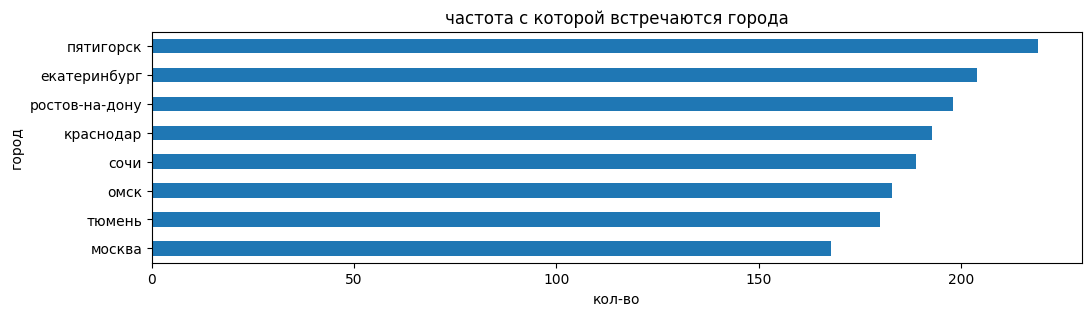

In [8]:
pt_city = users.pivot_table(index = 'city', values = 'user_id', aggfunc = ['count'])
pt_city.columns = pt_city.columns.droplevel()
pt_city.columns = ['count']

pt_city = pt_city.sort_values(by = 'count', ascending = True)
pt_city ['part'] = pt_city['count'] / (pt_city['count'].sum())

display (pt_city)

plt.figure(figsize = (12,3))
pt_city['count'].plot.barh()
plt.title('частота с которой встречаются города')
plt.xlabel('кол-во')
plt.ylabel('город')

plt.show()

##### соотношение пользователей с подпиской и без подписки

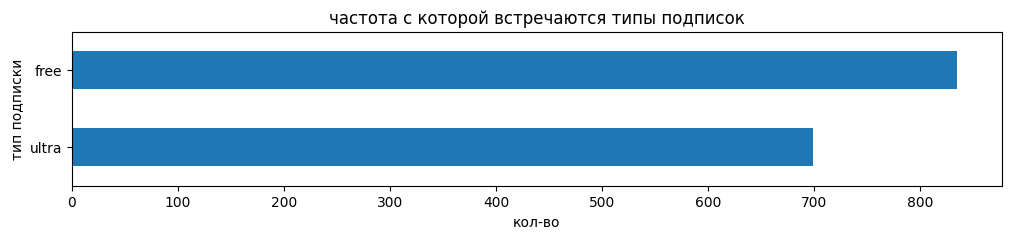

,count,part
subscription_type,,
ultra,699,0.455671
free,835,0.544329


In [9]:
pt_subscription_type = users.pivot_table(index = 'subscription_type',
                                         values = 'user_id',
                                         aggfunc = ['count'])
pt_subscription_type.columns = pt_subscription_type.columns.droplevel()
pt_subscription_type.columns = ['count']

pt_subscription_type = pt_subscription_type.sort_values(by = 'count', ascending = True)
pt_subscription_type ['part'] = pt_subscription_type['count'] / (pt_subscription_type['count'].sum())


plt.figure(figsize = (12,2))
pt_subscription_type['count'].plot.barh()
plt.title('частота с которой встречаются типы подписок')
plt.xlabel('кол-во')
plt.ylabel('тип подписки')
plt.show()

display (pt_subscription_type)

##### возраст пользователей

min =  12
mean =  24.9
median =  25.0
max =  43


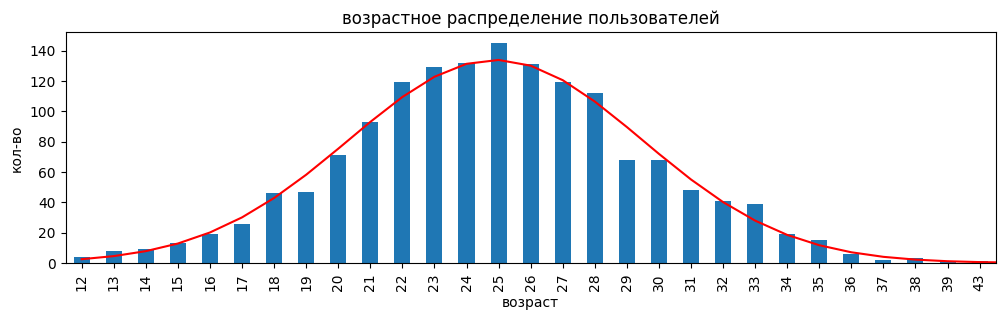

In [10]:
pt_age = users.pivot_table(index = 'age', values = 'user_id', aggfunc = ['count'])
pt_age.columns = pt_age.columns.droplevel()
pt_age.columns = ['count']

#display (pt_age)

print('min = ', round(users['age'].min(),2))
print('mean = ', round(users['age'].mean(),2))
print('median = ', round(users['age'].median(),2))
print('max = ', round(users['age'].max(),2))

mu = users['age'].mean()
sigma = users['age'].var() ** 0.5

x = np.arange (0, users['age'].max() - users['age'].min(), 1)

plt.figure(figsize = (12,2))
pt_age['count'].plot.bar(figsize = (12,3))
plt.plot (x, pt_age['count'].sum() * st.norm. pdf (x, mu - 12, sigma), color = 'red') 
plt.title('возрастное распределение пользователей')
plt.xlabel('возраст')
plt.ylabel('кол-во')
plt.show()


##### расстояние, которое пользователь преодолел за одну поездку

<Figure size 1200x200 with 0 Axes>

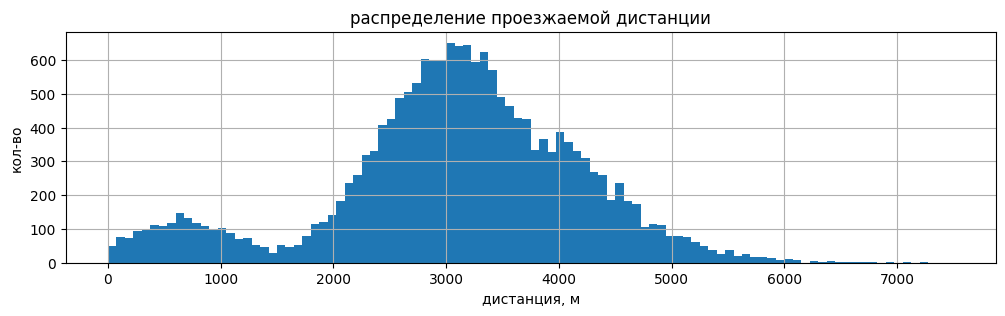

min =  0.86
mean =  3070.66
median =  3133.61
max =  7211.01


In [11]:
plt.figure(figsize = (12,2))
rides.hist('distance', bins = 100, figsize = (12,3), range = (0,7500))
plt.title('распределение проезжаемой дистанции')
plt.xlabel('дистанция, м')
plt.ylabel('кол-во')
plt.show()

print('min = ', round(rides['distance'].min(),2))
print('mean = ', round(rides['distance'].mean(),2))
print('median = ', round(rides['distance'].median(),2))
print('max = ', round(rides['distance'].max(),2))


##### продолжительность поездок

<Figure size 1200x200 with 0 Axes>

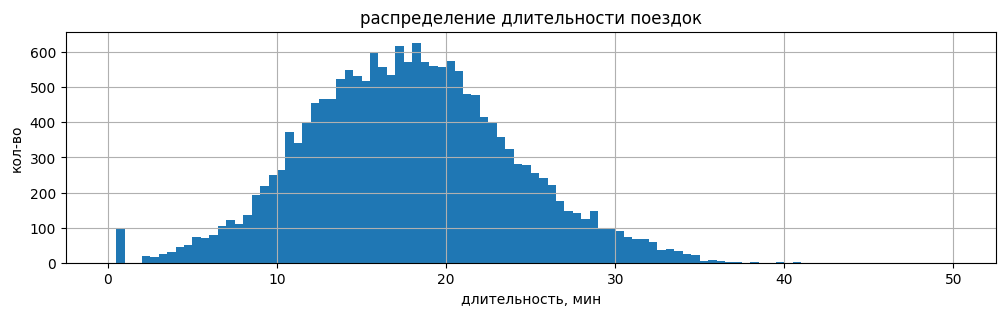

min =  0.5
mean =  17.81
median =  17.68
max =  40.82


In [12]:
plt.figure(figsize = (12,2))
rides.hist('duration', bins = 100, figsize = (12,3), range = (0, 50))
plt.title('распределение длительности поездок')
plt.xlabel('длительность, мин')
plt.ylabel('кол-во')
plt.show()

print('min = ', round(rides['duration'].min(),2))
print('mean = ', round(rides['duration'].mean(),2))
print('median = ', round(rides['duration'].median(),2))
print('max = ', round(rides['duration'].max(),2))


##### распределение средней скорости построим отдельно для значение менее 30 км/ч и более 30 км/ч

min =  0.01
mean =  13.79
median =  10.25
max =  865.32


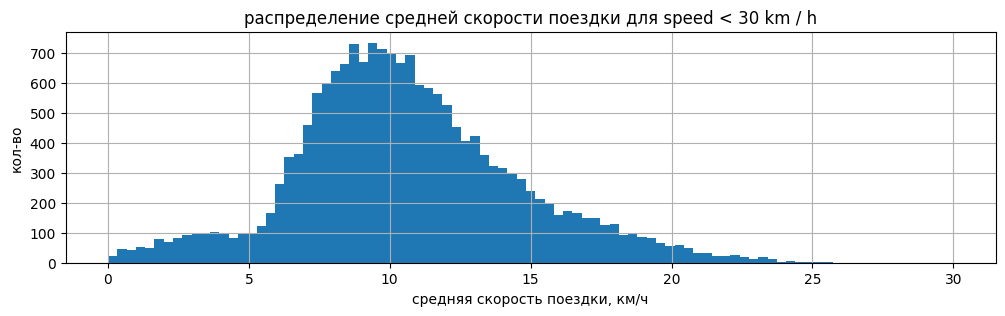

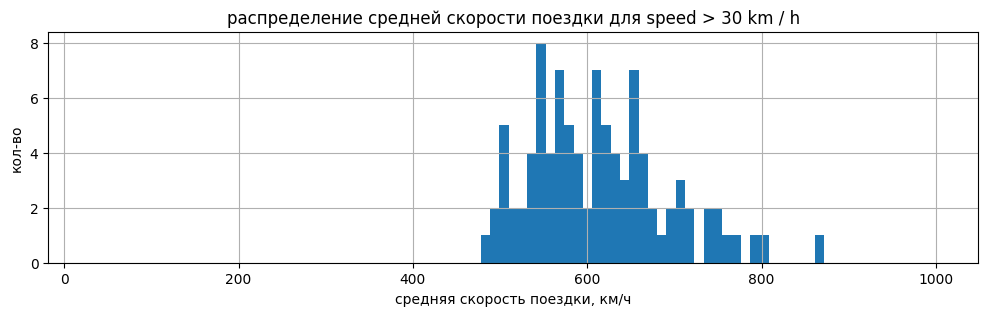

In [13]:
#рассчитаем среднюю скорость и переведем ее в км.ч
rides['speed']=rides['distance'] / rides['duration'] /1000 * 60

plt.figure(figsize = (12,3))
plt.hist(rides['speed'], range = (0,30), bins = 91)
plt.title ('распределение средней скорости поездки для speed < 30 km / h')
plt.xlabel('средняя скорость поездки, км/ч')
plt.ylabel('кол-во')
plt.grid(1)

plt.figure(figsize = (12,3))
plt.hist(rides['speed'], range = (30,1000), bins = 91)
plt.title ('распределение средней скорости поездки для speed > 30 km / h')
plt.xlabel('средняя скорость поездки, км/ч')
plt.ylabel('кол-во')
plt.grid(1)

print('min = ', round(rides['speed'].min(),2))
print('mean = ', round(rides['speed'].mean(),2))
print('median = ', round(rides['speed'].median(),2))
print('max = ', round(rides['speed'].max(),2))


да им бы позовидовал вам Валттери Боттасб, обладатель официального рекорда F1 (2016) в 372,54 км/ч.

посмотрим на данные подробнее:

<Figure size 1200x200 with 0 Axes>

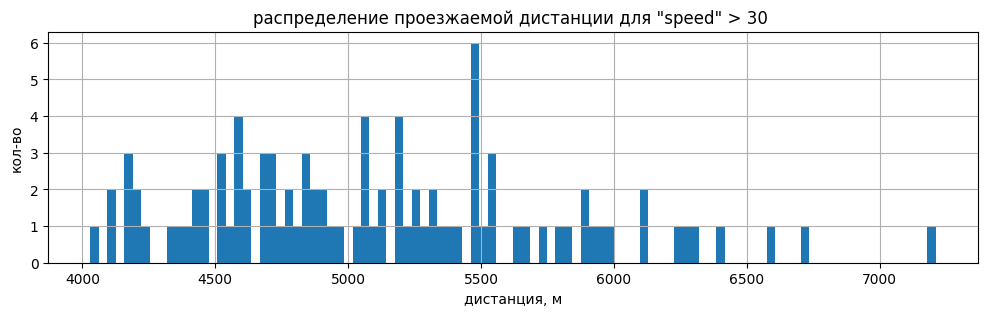

<Figure size 1200x200 with 0 Axes>

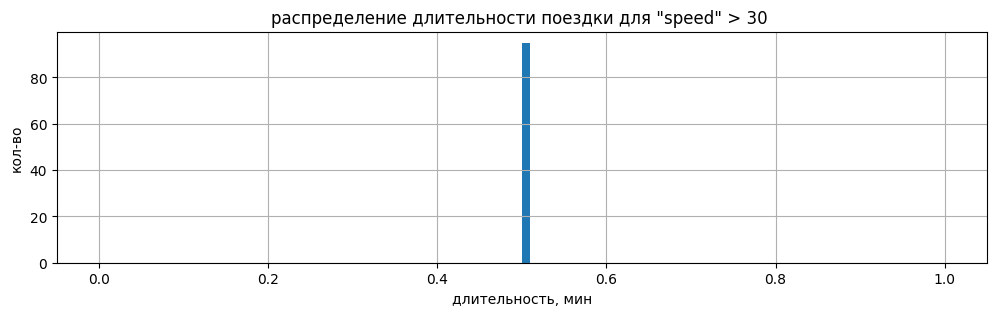

ко-во строк с "рекордными" скоростями: 95
общее кол-во строк: 18068
при удалении "рекордных" скоростей потеряем:  0.53 %


In [14]:
plt.figure(figsize = (12,2))
rides.loc[rides['speed'] > 30].hist('distance', bins = 100, figsize = (12,3))
plt.title('распределение проезжаемой дистанции для "speed" > 30 ')
plt.xlabel('дистанция, м')
plt.ylabel('кол-во')
plt.show()

plt.figure(figsize = (12,2))
rides.loc[rides['speed'] > 30].hist('duration', bins = 100, figsize = (12,3))
plt.title('распределение длительности поездки для "speed" > 30 ')
plt.xlabel('длительность, мин')
plt.ylabel('кол-во')
plt.show()

print('ко-во строк с "рекордными" скоростями:', rides.loc[rides['speed'] > 30]['user_id'].count())
print('общее кол-во строк:', rides['user_id'].count())
print('при удалении "рекордных" скоростей потеряем: ',
      round(100 * rides.loc[rides['speed'] > 30]['user_id'].count() / rides['user_id'].count(),2),'%')


<div class="summary", style="border:solid blue 1px; padding: 5px">
    <font size="3", color = "black">

как видно из распределения, все данные со сверхвысокими скоростями соответствуют длительности поездки в 0.5 мин.

In [15]:
# удаляем строки
rides = rides.loc[rides['speed'] <= 30]

##### распределение дистанции поездок:

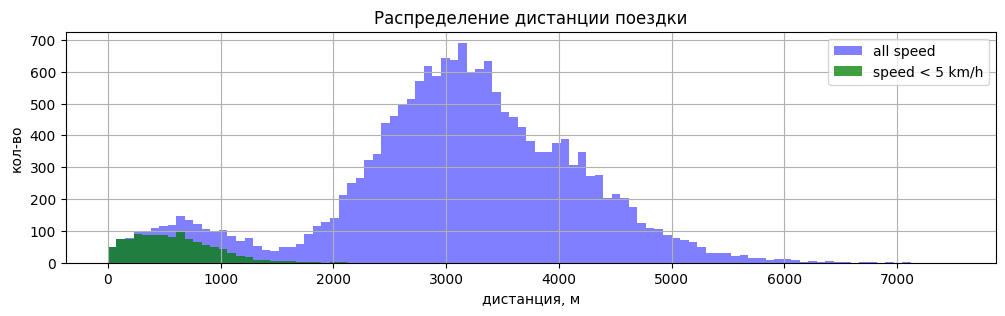

In [16]:
bins = np.linspace(0, 7500, 100)
plt.figure(figsize=(12,3))
plt.hist(rides['distance'], bins, alpha = 0.5, color = 'b')
plt.hist(rides['distance'].loc[rides['speed'] < 5], bins, alpha = 0.75, color = 'g')

plt.title('Распределение дистанции поездки')
plt.legend(['all speed', 'speed < 5 km/h'])
plt.xlabel('дистанция, м')
plt.ylabel('кол-во')
plt.grid(True)

plt.show()

<div class="summary", style="border:solid blue 1px; padding: 5px">
<font size="3", color = "blue"><b> 
    промежуточные выводы: </b></font>
    <font size="3", color = "black">
<br />

1. Представленные данные достаточно чистые
2.  Больше всего пользователей зарегистрировано в Пятигорске (14 %), Екатеринбурге (13%) и Ростове-на-дону (13%). 
   Меньше всего пользователей зарегистрировано в Москве (12%) и Омске (12%).
3. 54% пользователей имеют подписку Free и 46% - подписку Ultra
4. Распределение дистанции поездок можно разделить на 2 части: до 1500м и более 1500м. В первой части преобладают скорости до 5 км/ч.
5. Распределение продолжительности поездок имеет распределение близкое к нормальному и узкий пик на 0.5 мин.
   Поездки, соответствующие этому пику имеет невообразимую сторость для самокатов (> 400 км/ч). Эти данные составляют 0.53% выборки и их мы удаляем
6. Распределение скорости имеет явный пик на 10 км/ч с резким левым краем и плавным спадом справа. При этом имеется некоторое кол-во событий со скоростью в дипазаоне 0-5 км/ч. Подавляющее большинство из них связано с небольшой дистанцией поездки (до 1.5 км).
7. экстремально большие или отрицательные значения не обнаружены.

#### Шаг 4. Объединение данных

##### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [17]:
df = rides.merge(users,
                 left_on = 'user_id',
                 right_on = 'user_id',
                 how = 'left')
df = df.merge(subscriptions,
              left_on = 'subscription_type',
              right_on = 'subscription_type',
              how = 'left')
#df.info()

In [18]:
rides.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17973 entries, 0 to 18067
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
 4   month     17973 non-null  int32         
 5   week_day  17973 non-null  int32         
 6   speed     17973 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1)
memory usage: 982.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date         

##### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
 - c данными о пользователях без подписки;
 - с данными о пользователях с подпиской.

In [19]:
df_free = df.loc[df['subscription_type'] == 'free']

In [20]:
df_ultra = df.loc[df['subscription_type'] == 'ultra']

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

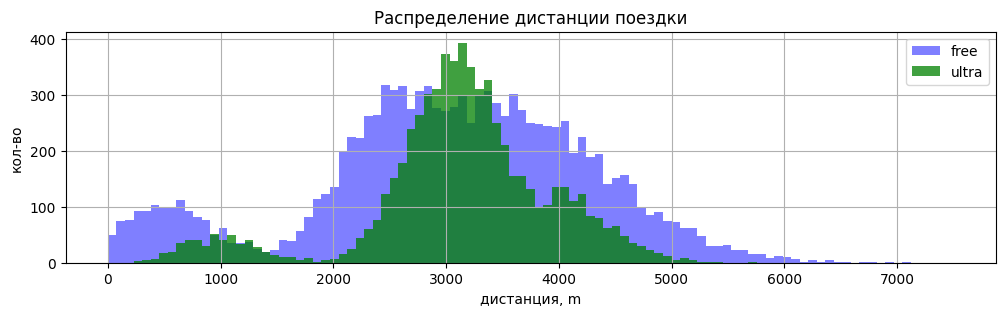

In [21]:
bins = np.linspace(0, 7500, 100)
plt.figure(figsize=(12,3))
plt.hist(df_free['distance'], bins, alpha = 0.5, color = 'b')
plt.hist(df_ultra['distance'], bins, alpha = 0.75, color = 'g')

plt.title('Распределение дистанции поездки')
plt.legend(['free', 'ultra'])
plt.xlabel('дистанция, m')
plt.ylabel('кол-во')
plt.grid(True)

plt.show()

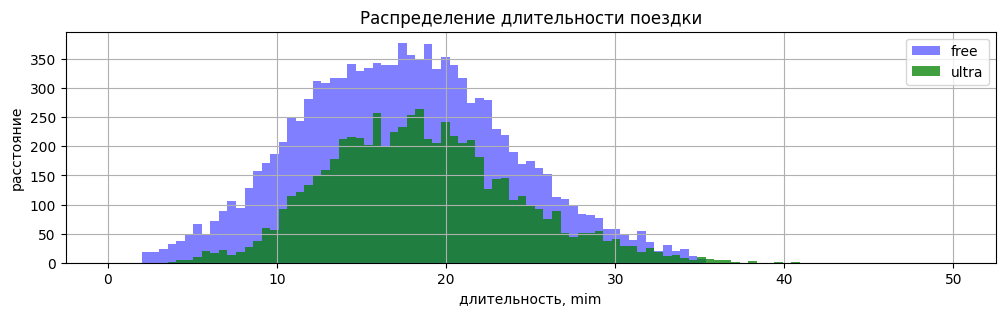

In [22]:
bins = np.linspace(0, 50, 100)
plt.figure(figsize=(12,3))
plt.hist(df_free['duration'], bins, alpha = 0.5, color = 'b')
plt.hist(df_ultra['duration'], bins, alpha = 0.75, color = 'g')

plt.title('Распределение длительности поездки')
plt.legend(['free', 'ultra'])
plt.xlabel('длительность, mim')
plt.ylabel('расстояние')
plt.grid(True)

plt.show()



<div class="summary", style="border:solid blue 1px; padding: 5px">
<font size="3", color = "blue"><b> 
    промежуточные выводы: </b></font>
    <font size="3", color = "black">
<br />

1. Распределение дистанции поездки для ultra (в сравнении с free) имеет более узкий пик вблизи 3 км, пик в промежутке 0-1.5 км смещен в большую сторону, также имеется пик на дистанции ~ 4км 
2.  Распределение длительности поездки для ultra и free имеют схожие распределения. при этом распределение для free немного шире, а распределение для ultra имеет более медленный спад правого части.


#### Шаг 5. Подсчёт выручки

##### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [23]:
df_users = df.pivot_table(index = ['user_id', 'month'],
                          aggfunc = {'distance' : 'sum',
                                     'user_id' : 'count',
                                     'duration' : 'sum'})

df_users.columns = ['t_distance', 't_duration', 't_count']
df_users.reset_index(inplace = True)
#display (df_users)

##### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь — обратитесь к информации об условиях оплаты для подписчиков и и тех, у кого нет подписки. Минуты при подсчёте стоимости округляются до ближайшего целого числа.

In [24]:
df_users['t_duration_min'] = round(df_users['t_duration'],0)

df_users = (df_users.merge(df[['user_id',
                               'subscription_type',
                               'minute_price',
                               'start_ride_price',
                               'subscription_fee']],
                           left_on = 'user_id',
                           right_on = 'user_id')
                    .drop_duplicates())

df_users = df_users.reset_index()

In [25]:
df_users['revenue'] = (df_users['subscription_fee'] +
                       + df_users['start_ride_price'] * df_users['t_count'] +
                       + df_users['minute_price'] * df_users['t_duration_min'])

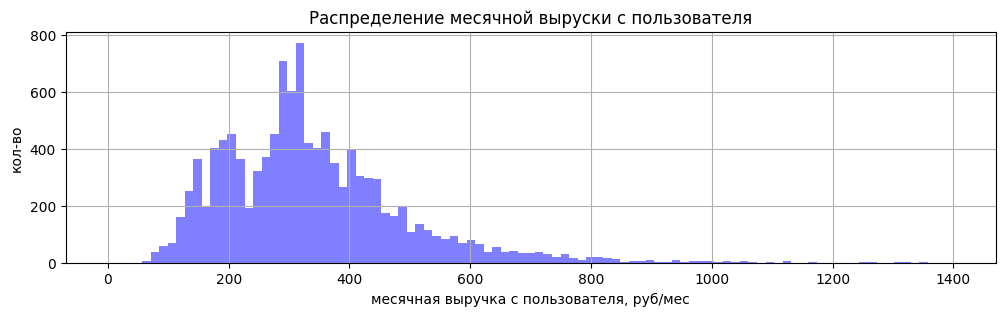

quantile(0.25) =  234.0
quantile(0.50) =  314.0
quantile(0.75) =  409.0


In [26]:
bins = np.linspace(0, 1400, 100)
plt.figure(figsize=(12,3))
plt.hist(df_users['revenue'], bins, alpha = 0.5, color = 'b')

plt.title('Распределение месячной выруски с пользователя')
plt.xlabel('месячная выручка с пользователя, руб/мес')
plt.ylabel('кол-во')
plt.grid(True)
plt.show()

print('quantile(0.25) = ', df_users['revenue'].quantile(0.25))
print('quantile(0.50) = ', df_users['revenue'].quantile(0.5))
print('quantile(0.75) = ', df_users['revenue'].quantile(0.75))


<div class="summary", style="border:solid blue 1px; padding: 5px">
<font size="3", color = "blue"><b> 
    промежуточные выводы: </b></font>
    <font size="3", color = "black">
<br />

1. 50% пользователей платят от 230 до 410 руб в мес. Медианное значение составляем 314 рум в мес.
2. В распределении ежемесячной выруски с клиента можно выделить два пика: в даипазоне ~ 200 и ~ 300 руб / мес

#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то действительно ли пользователи с подпиской «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H0: среднее время поездки у пользователей с подпиской и без подписки одинаковое

H1: среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки

средняя продолжительность поездки free: 18.54
средняя продолжительность поездки ultra: 17.53
p-value = 1.6162210195311063e-29 

Гипотеза h1 подтвердилась
Средняя длительность поездки пользователей без подписки меньше, чем с подпиской "ultra"


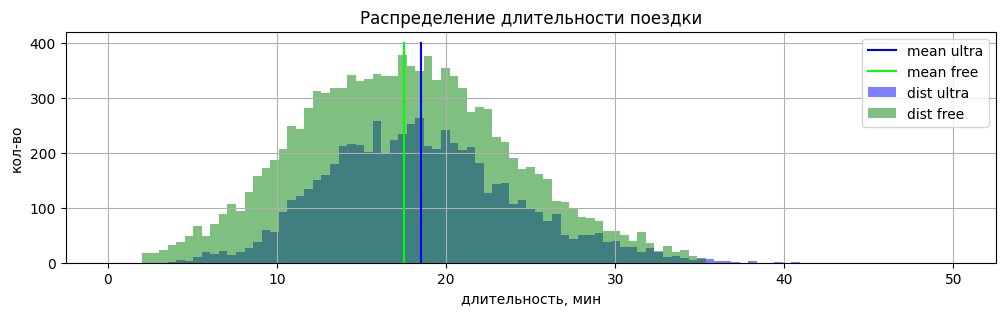

In [27]:
array1 = df.loc[df['subscription_type'] == 'ultra']['duration']
array2 = df.loc[df['subscription_type'] == 'free']['duration']

alpha = 0.01
result = st.ttest_ind(array1, array2, alternative = 'greater', equal_var = False)

print('средняя продолжительность поездки free:', round(array1.mean(),2))
print('средняя продолжительность поездки ultra:', round(array2.mean(),2))
print('p-value =', result.pvalue, '\n')

if result.pvalue < alpha:
    print('Гипотеза h1 подтвердилась')
    print('Средняя длительность поездки пользователей без подписки меньше, чем с подпиской "ultra"')
else:
    print('Гипотеза h1 не подтвердилась')

    
bins = np.linspace(0, 50, 100)
plt.figure(figsize=(12,3))
plt.hist(array1, bins, alpha = 0.5, color = 'b')
plt.hist(array2, bins, alpha = 0.5, color = 'g')

plt.plot([array1.mean(), array1.mean()], [0, 400], color = 'b')
plt.plot([array2.mean(), array2.mean()], [0, 400], color = 'lime')

plt.title('Распределение длительности поездки')
plt.legend(['mean ultra', 'mean free','dist ultra','dist free'])
plt.xlabel('длительность, мин')
plt.ylabel('кол-во')
plt.grid(True)

plt.show()

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров?

H0: среднее расстояние, которое проезжает пользователь с подпиской Ultra составляет 3130 метров

H1: среднее расстояние, которое проезжает пользователь с подпиской Ultra менее 3130 метров

среднее расстояние поездки ultra: 3115.45 м
p-value = 0.08046311521502147 

Гипотеза h1 не подтвердилась


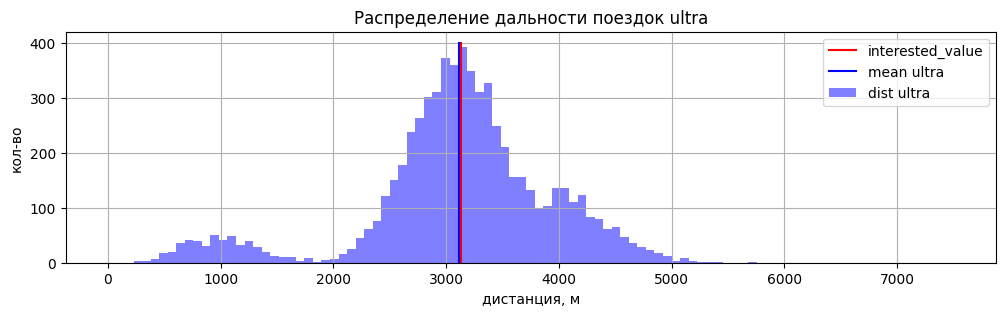

In [28]:
array2 = df.loc[df['subscription_type'] == 'ultra']['distance']

alpha = 0.01
interested_value = 3130

result = st.ttest_1samp(array2, interested_value, alternative = 'less')

print('среднее расстояние поездки ultra:', round(array2.mean(),2), 'м')
print('p-value =', result.pvalue, '\n')

if result.pvalue < alpha:
    print('Гипотеза h1 подтвердилась')
else:
    print('Гипотеза h1 не подтвердилась')
    

    
bins = np.linspace(0, 7500, 100)
plt.figure(figsize=(12,3))
plt.hist(array2, bins, alpha = 0.5, color = 'b')

plt.plot([interested_value, interested_value], [0, 400], color = 'red')
plt.plot([array2.mean(), array2.mean()], [0, 400], color = 'b')

plt.title('Распределение дальности поездок ultra')
plt.legend(['interested_value','mean ultra', 'dist ultra'])
plt.xlabel('дистанция, м')
plt.ylabel('кол-во')
plt.grid(True)

#plt.show()

##### Проверьте гипотезу о том, будет ли выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Сделайте вывод.

H0: выручка от пользователей с подпиской Ultra равна выручке от пользователей, не обладающих подпиской

H1: выручка от пользователей с подпиской Ultra больше, чем выручка от пользователей без подписки

среднемесячная выручка free: 322.01
среднемесячная выручка ultra: 348.02
p-value = 4.248630567708181e-18 

Гипотеза h1 подтвердилась


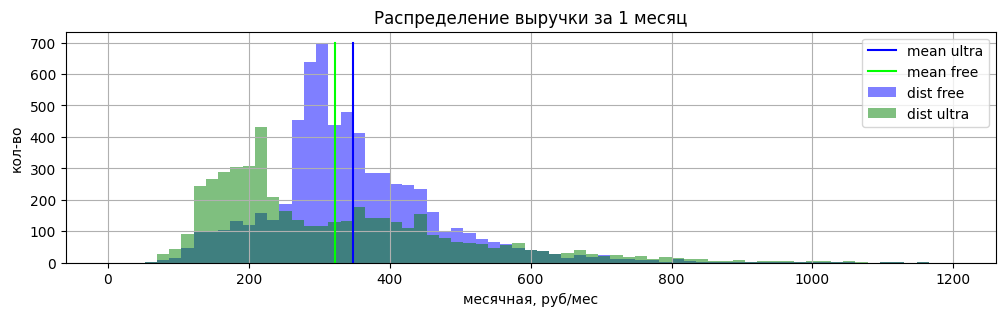

In [29]:
array1 = df_users.loc[df['subscription_type'] == 'ultra']['revenue']
array2 = df_users.loc[df['subscription_type'] == 'free']['revenue']

alpha = 0.01
result = st.ttest_ind(array1, array2, alternative = 'greater', equal_var = False)

print('среднемесячная выручка free:', round(df_users.loc[df['subscription_type'] == 
                                                         'free']['revenue'].mean(),2))
print('среднемесячная выручка ultra:',round(df_users.loc[df['subscription_type'] == 
                                                         'ultra']['revenue'].mean(),2))
print('p-value =', result.pvalue, '\n')

if result.pvalue < alpha:
    print('Гипотеза h1 подтвердилась')
else:
    print('Гипотеза h1 не подтвердилась')



bins = np.linspace(0, 1200, 70)
plt.figure(figsize=(12,3))
plt.hist(array1, bins, alpha = 0.5, color = 'b')
plt.hist(array2, bins, alpha = 0.5, color = 'g')

plt.plot([array1.mean(), array1.mean()], [0, 700], color = 'b')
plt.plot([array2.mean(), array2.mean()], [0, 700], color = 'lime')

plt.title('Распределение выручки за 1 месяц')
plt.legend(['mean ultra', 'mean free','dist free','dist ultra'])
plt.xlabel('месячная, руб/мес')
plt.ylabel('кол-во')
plt.grid(True)

plt.show()

<div class="summary", style="border:solid blue 1px; padding: 5px">
<font size="3", color = "blue"><b> 
    Выводы: </b></font>
    <font size="3", color = "black">
<br />

1. Сервисом пользуются 1534 клиентов в 8 городах. Больше всего пользователей зарегистрировано в Пятигорске (14 %), Екатеринбурге (13%) и Ростове-на-дону (13%), меньше всего - в Москве (12%) и Омске (12%). Суммарно за 2022 год было совершенно 18068 поездок.

2. В рамках обработки данных было выявлено:
 - 31 дубликат (что составило 2% клиентов), данные удалены
 - 91 поездка, соответствующее чрезвычайно большой скорости (0.53% от поездок), данные удалены
 - Экстремальных (выпадающих) значений обнаружено не было.
        
3. 54% пользователей не имеют подписки ('free'), 46% пользователей обладают подпиской ultra.

4. Визуальное не существенное отличие наблюдается в распределнии дистанции поездок для пользователей, обладающих подпиской, и пользователей без подписки. Распределение для пользователей с подпиской ultra (в сравнении с free) имеет более узкий пик вблизи 3 км, пик в промежутке 0-1.5 км смещен в большую сторону, также имеется пик на дистанции ~ 4км.

5. 50% пользователей платят от 230 до 410 руб в мес. Медианное значение составляем 314 рум в мес.

6. Результаты тестов:
 - тест 1:
      - H0: среднее время поездки у пользователей с подпиской и без подписки одинаковое
      - H1: среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки
          - H1 стат значима

 - тест 2:
      - H0: среднее расстояние, которое проезжает пользователь с подпиской Ultra составляет 3130 метров
      - H1: среднее расстояние, которое проезжает пользователь с подпиской Ultra менее 3130 метров
          - H1 не стат значима
 - тест 3:
      - H0: выручка от пользователей с подпиской Ultra равна выручке от пользователей, не обладающих подпиской
      - H1: выручка от пользователей с подпиской Ultra больше, чем выручка от пользователей без подписки
          - H1 стат значима
